In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Linear filtering

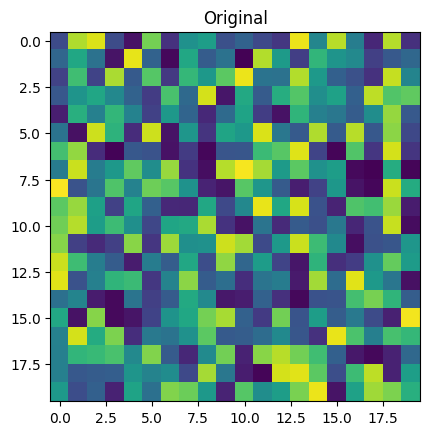

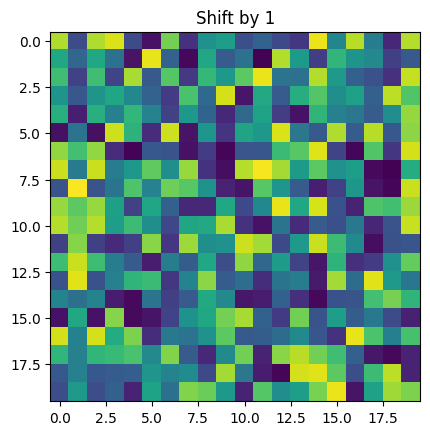

In [2]:
#Shift pixels by one
img = np.random.randint(0,255,size=[20, 20],dtype=np.uint8)
kernel = np.array([[0,0,0], [1,0,0], [0,0,0]])
output = cv2.filter2D(img, -1, kernel)

plt.title('Original')
plt.imshow(img, cmap='viridis', vmin=0, vmax=255)
plt.show()

plt.title('Shift by 1')
plt.imshow(output, cmap='viridis', vmin=0, vmax=255)
plt.show()


### Mean filter

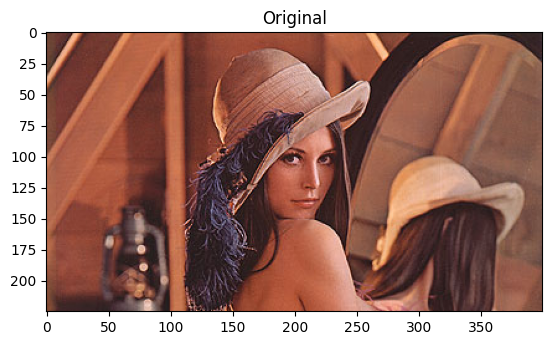

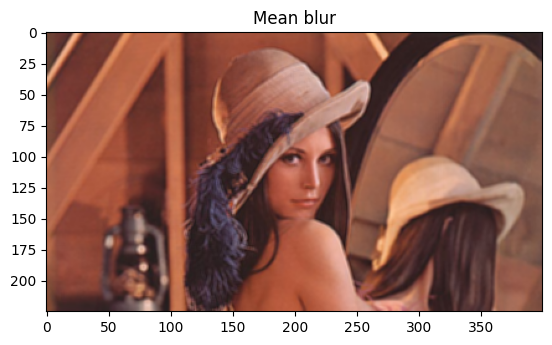

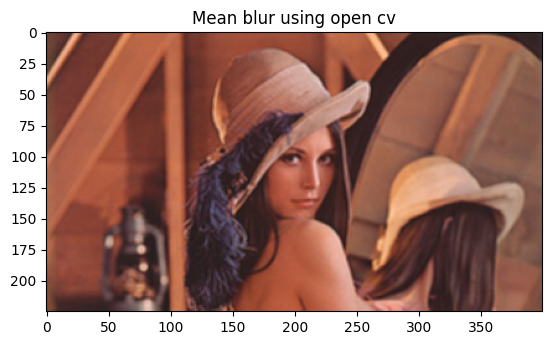

In [3]:
imBGR = cv2.imread("images/lena.jpg")
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

kernel = np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9 #important to add the division as filter 2d wont do it automatically
output = cv2.filter2D(imRGB, -1, kernel)

plt.title('Original')
plt.imshow(imRGB)
plt.show()

plt.title('Mean blur')
plt.imshow(output)
plt.show()

#using a more high level mean blur using opencv
blur = cv2.blur(imRGB, (3,3))
plt.title('Mean blur using open cv')
plt.imshow(blur)
plt.show()

## Gaussian Bluring

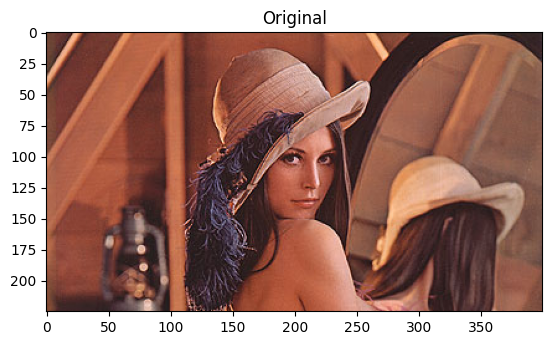

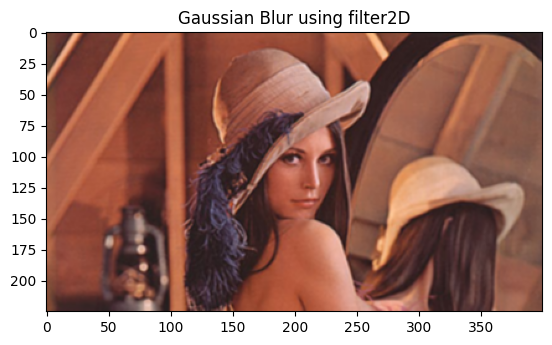

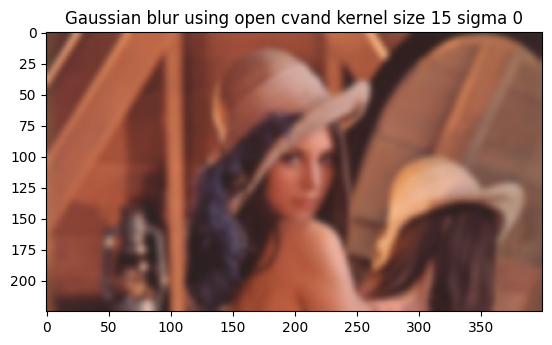

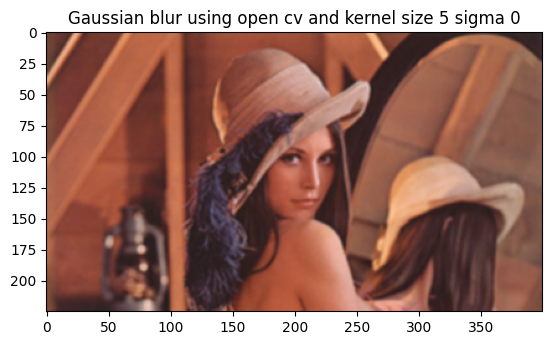

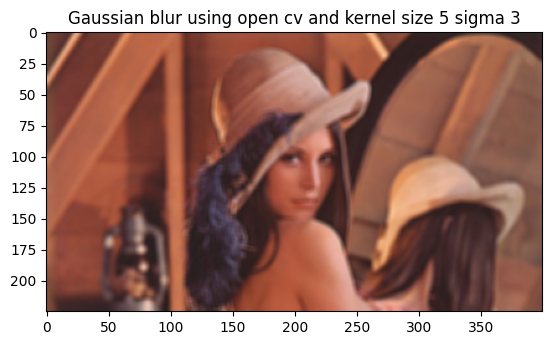

[[0.05448868]
 [0.24420134]
 [0.40261995]
 [0.24420134]
 [0.05448868]]


In [4]:
imBGR = cv2.imread("images/lena.jpg")
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

kernel = np.array([[1,2,1],
                   [2,4,2],         # Divisor should be sum of kernel
                   [1,2,1]]) / 16 #important to add the division as filter 2d wont do it automatically
output = cv2.filter2D(imRGB, -1, kernel)

plt.title('Original')
plt.imshow(imRGB)
plt.show()

plt.title('Gaussian Blur using filter2D')
plt.imshow(output)
plt.show()

#using a more high level mean blur using opencv
kernelSize = (15,15)
blur = cv2.GaussianBlur(imRGB, ksize=kernelSize, sigmaX=0, sigmaY=0)
plt.title('Gaussian blur using open cvand kernel size 15 sigma 0')
plt.imshow(blur)
plt.show()

#using a more high level mean blur using opencv
kernelSize = (5,5)
blur = cv2.GaussianBlur(imRGB, ksize=kernelSize, sigmaX=0, sigmaY=0)
plt.title('Gaussian blur using open cv and kernel size 5 sigma 0')
plt.imshow(blur)
plt.show()

#using a more high level mean blur using opencv
kernelSize = (5,5)
blur = cv2.GaussianBlur(imRGB, ksize=kernelSize, sigmaX=3, sigmaY=3)
plt.title('Gaussian blur using open cv and kernel size 5 sigma 3')
plt.imshow(blur)
plt.show()

gausian_kernel = cv2.getGaussianKernel(5, 1)
print(gausian_kernel)

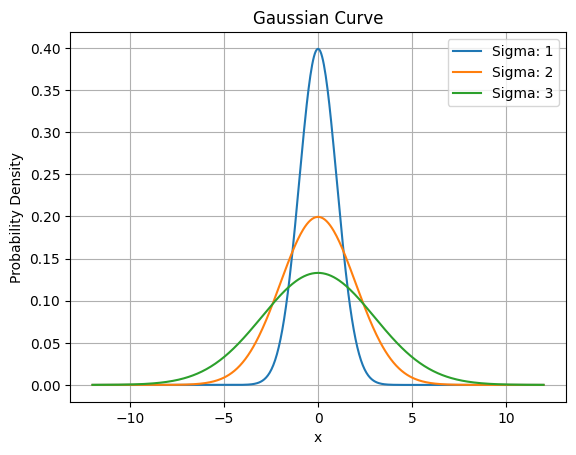

In [5]:
mu = 0       # mean
sigmas = [1,2,3]   # standard deviation
 
# Generate x values
x = np.linspace(mu - 4*max(sigmas), mu + 4*max(sigmas), 500)

for sigma in sigmas:
    # Gaussian formula
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))
    # Plot
    plt.plot(x, y, label = f"Sigma: {sigma}")

plt.title("Gaussian Curve")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

## High Pass filter (Sharpening)

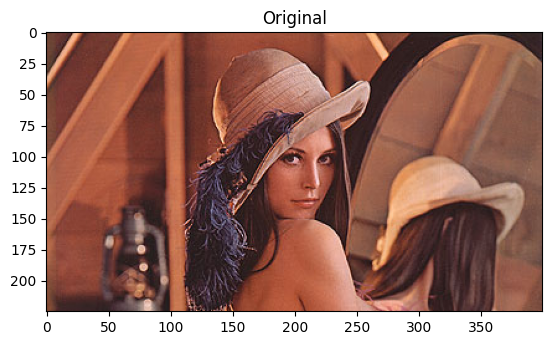

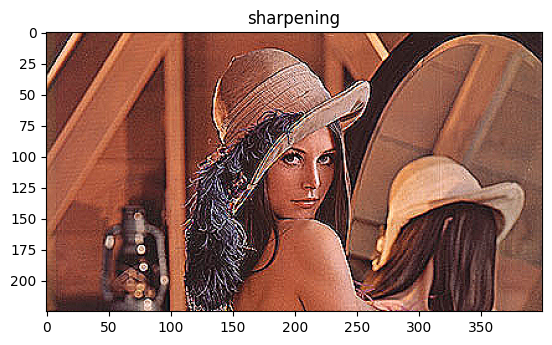

In [6]:
imBGR = cv2.imread("images/lena.jpg")
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) / 1
output = cv2.filter2D(imRGB, -1, kernel)

plt.title('Original')
plt.imshow(imRGB)
plt.show()

plt.title('sharpening')
plt.imshow(output)
plt.show()

# High Pass filter - Embossing

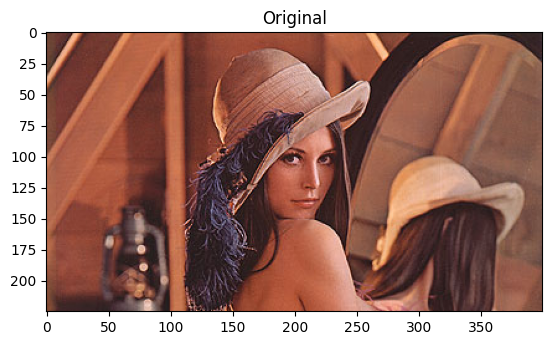

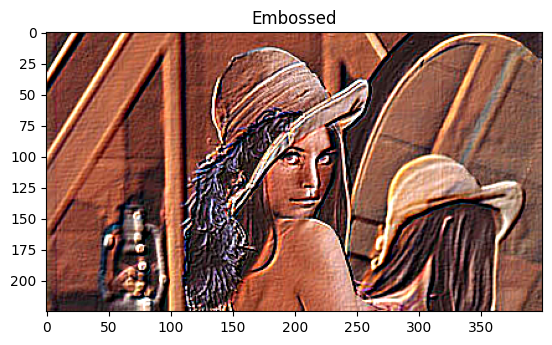

In [7]:
imBGR = cv2.imread("images/lena.jpg")
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]]) / 1 #important to add the division as filter 2d wont do it automatically
output = cv2.filter2D(imRGB, -1, kernel)

plt.title('Original')
plt.imshow(imRGB)
plt.show()

plt.title('Embossed')
plt.imshow(output)
plt.show()

Non-linear Filters:

1. Median filter - effective for salt and pepper

The principle of the median filter is to replace the gray level of each pixel by the median of the gray levels in a neighborhood of the pixels, instead of using the average operation.

Linear filtering is the filtering method in which the value of output pixel is linear combinations of the neighbouring input pixels. it can be done with convolution.For examples, mean/average filters or Gaussian filtering.
A non-linear filtering is one that cannot be done with convolution or Fourier multiplication. A sliding median filter is a simple example of a non-linear filter.



2. Bilateral filter

cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

The below sample shows use of a bilateral filter (For details on arguments, visit docs).
d	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
sigmaColor	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
sigmaSpace	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.

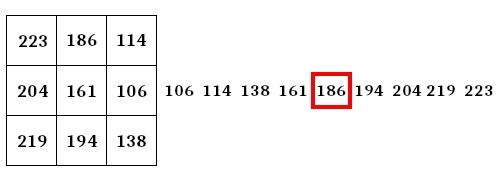

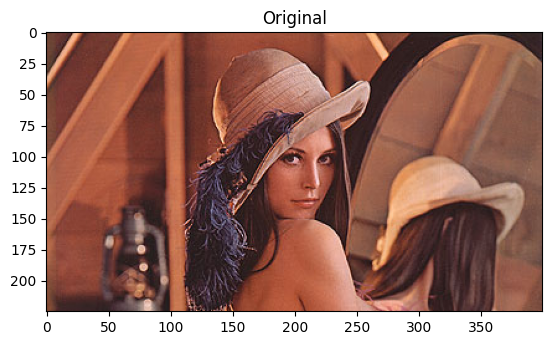

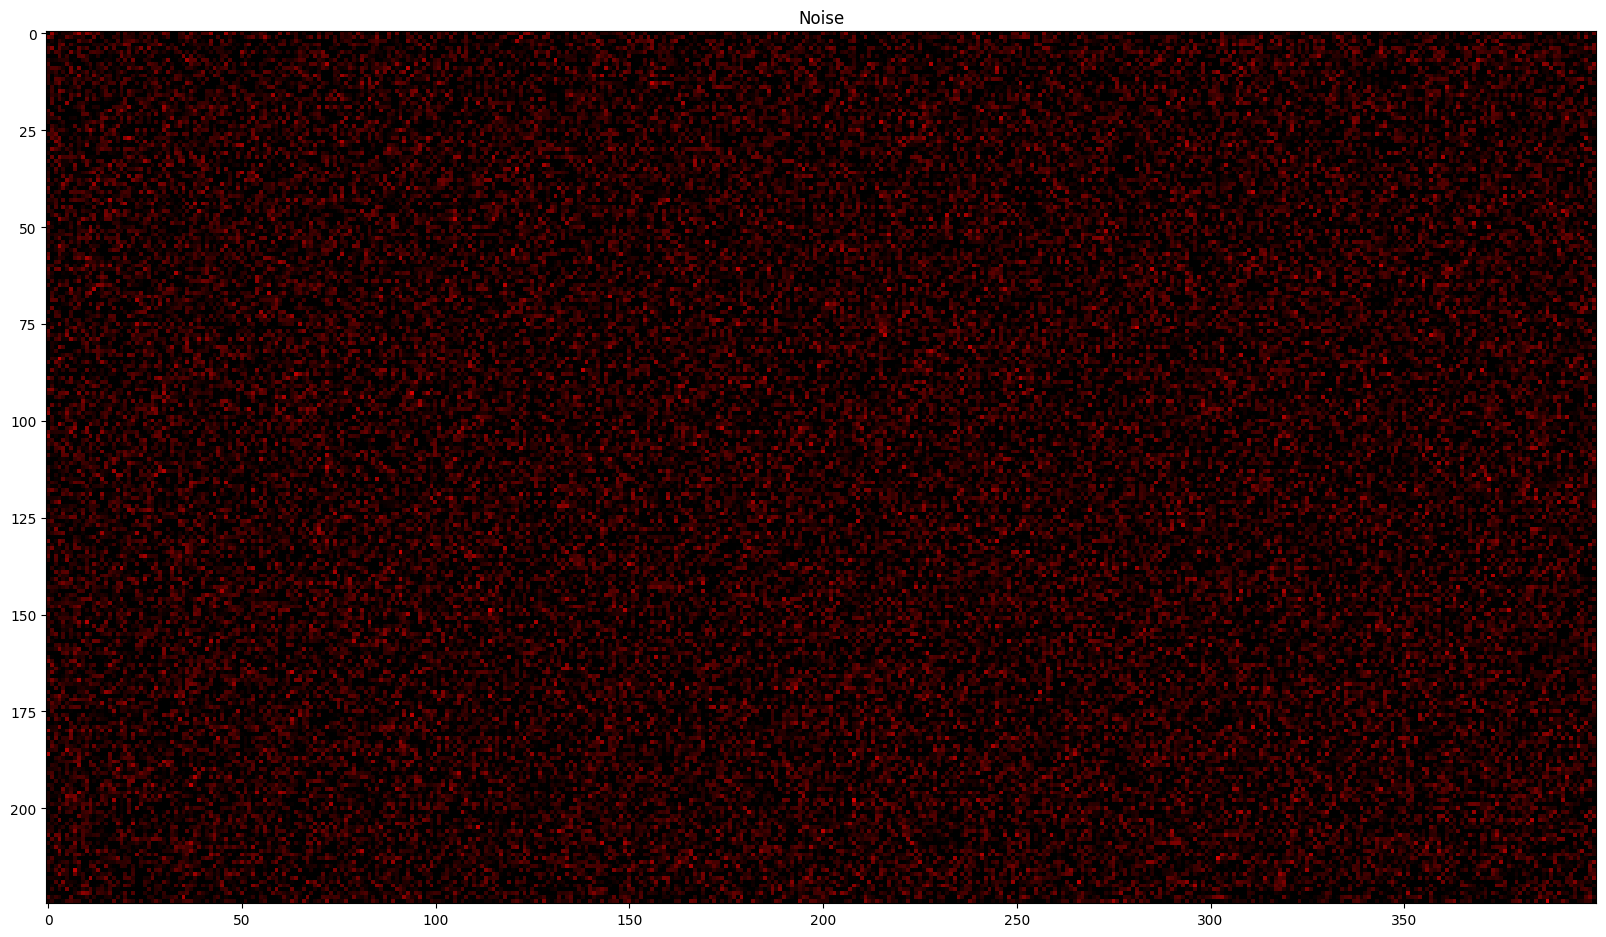

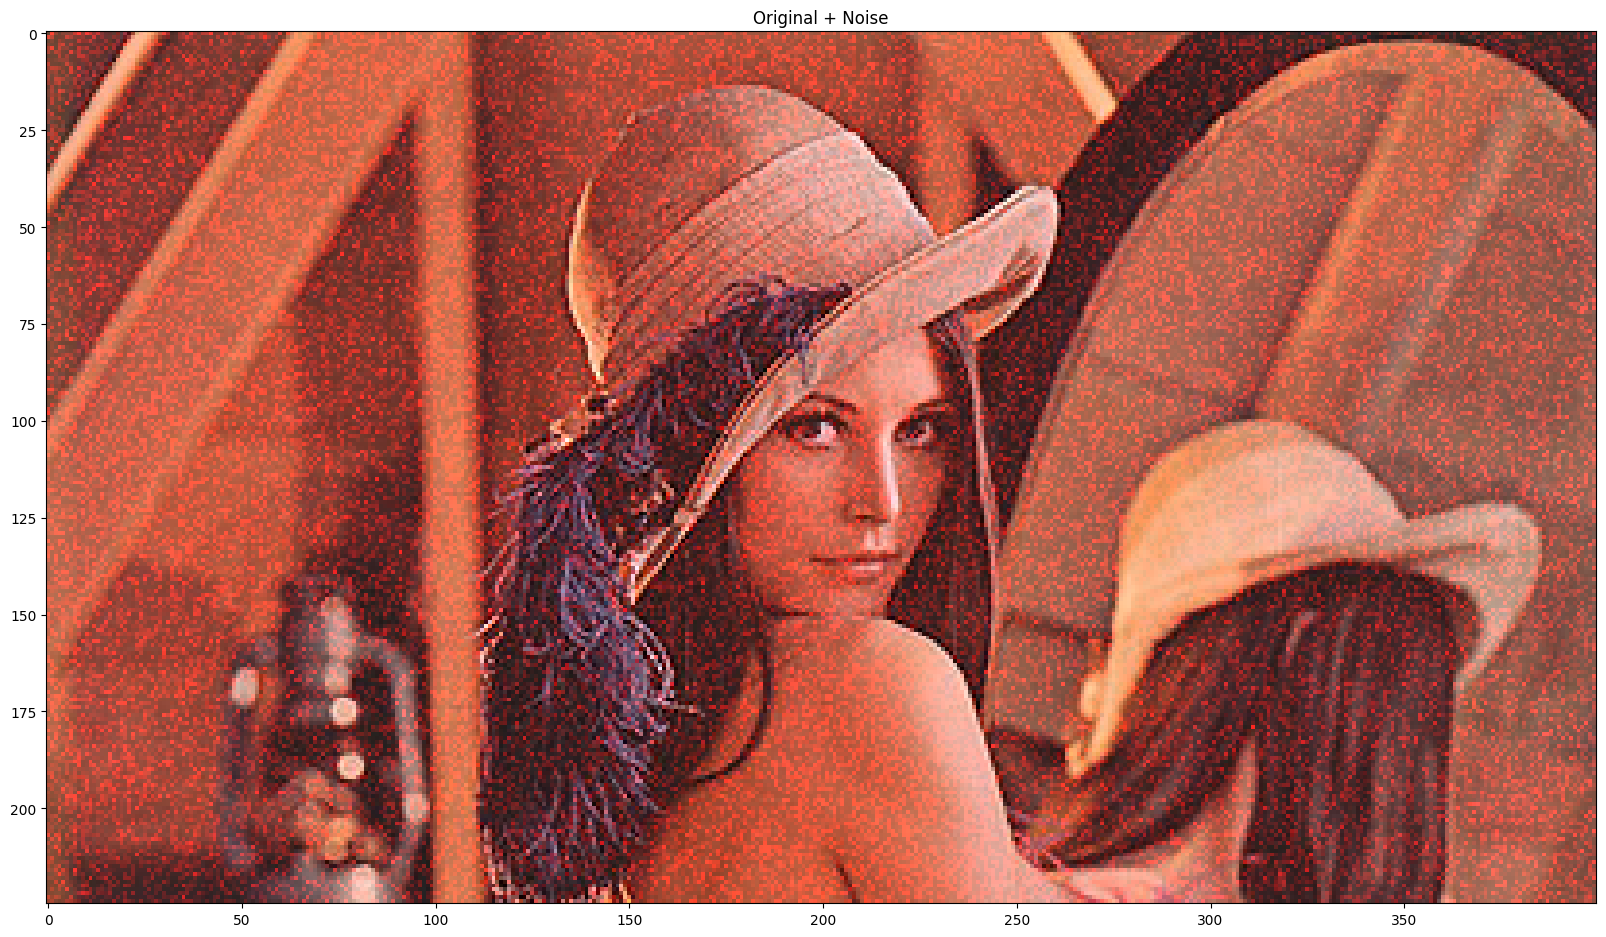

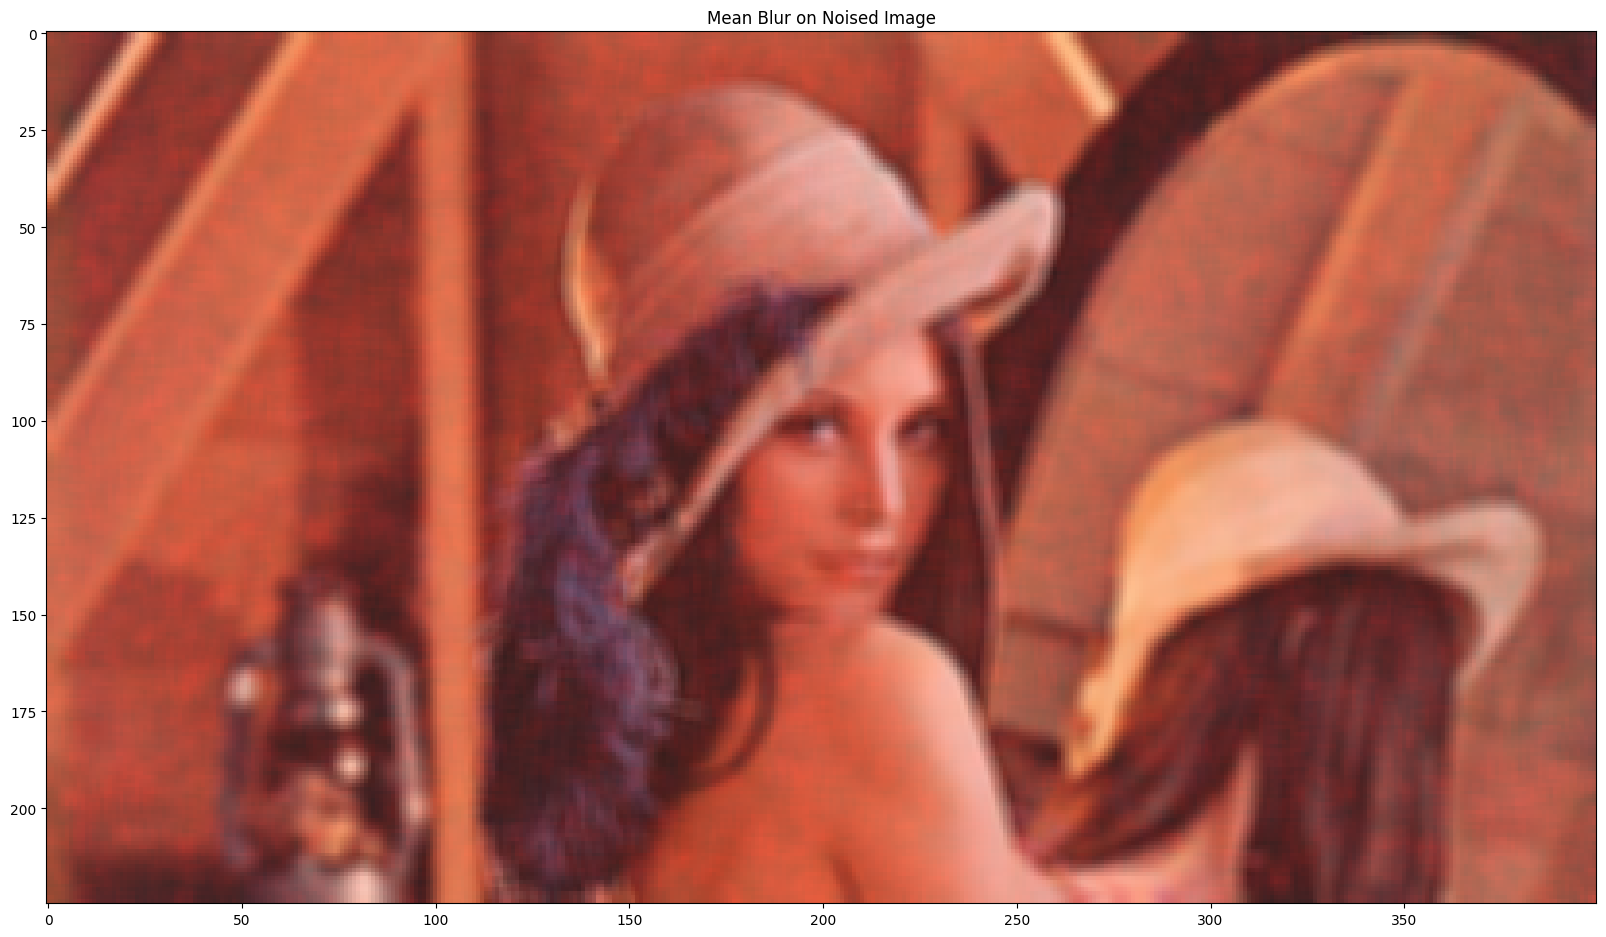

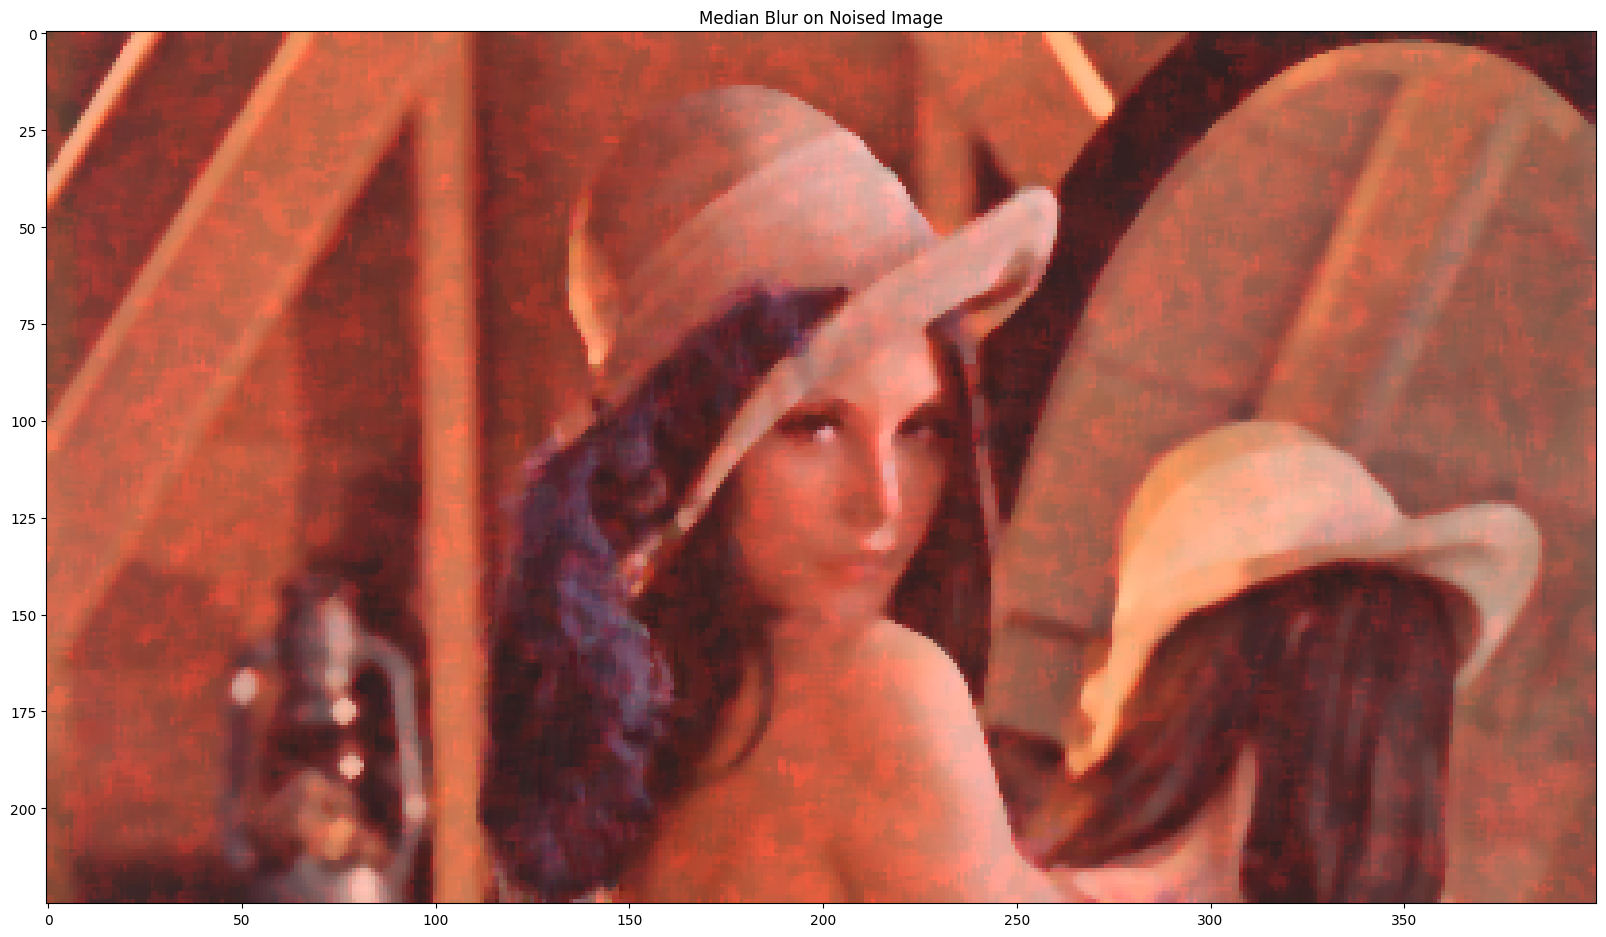

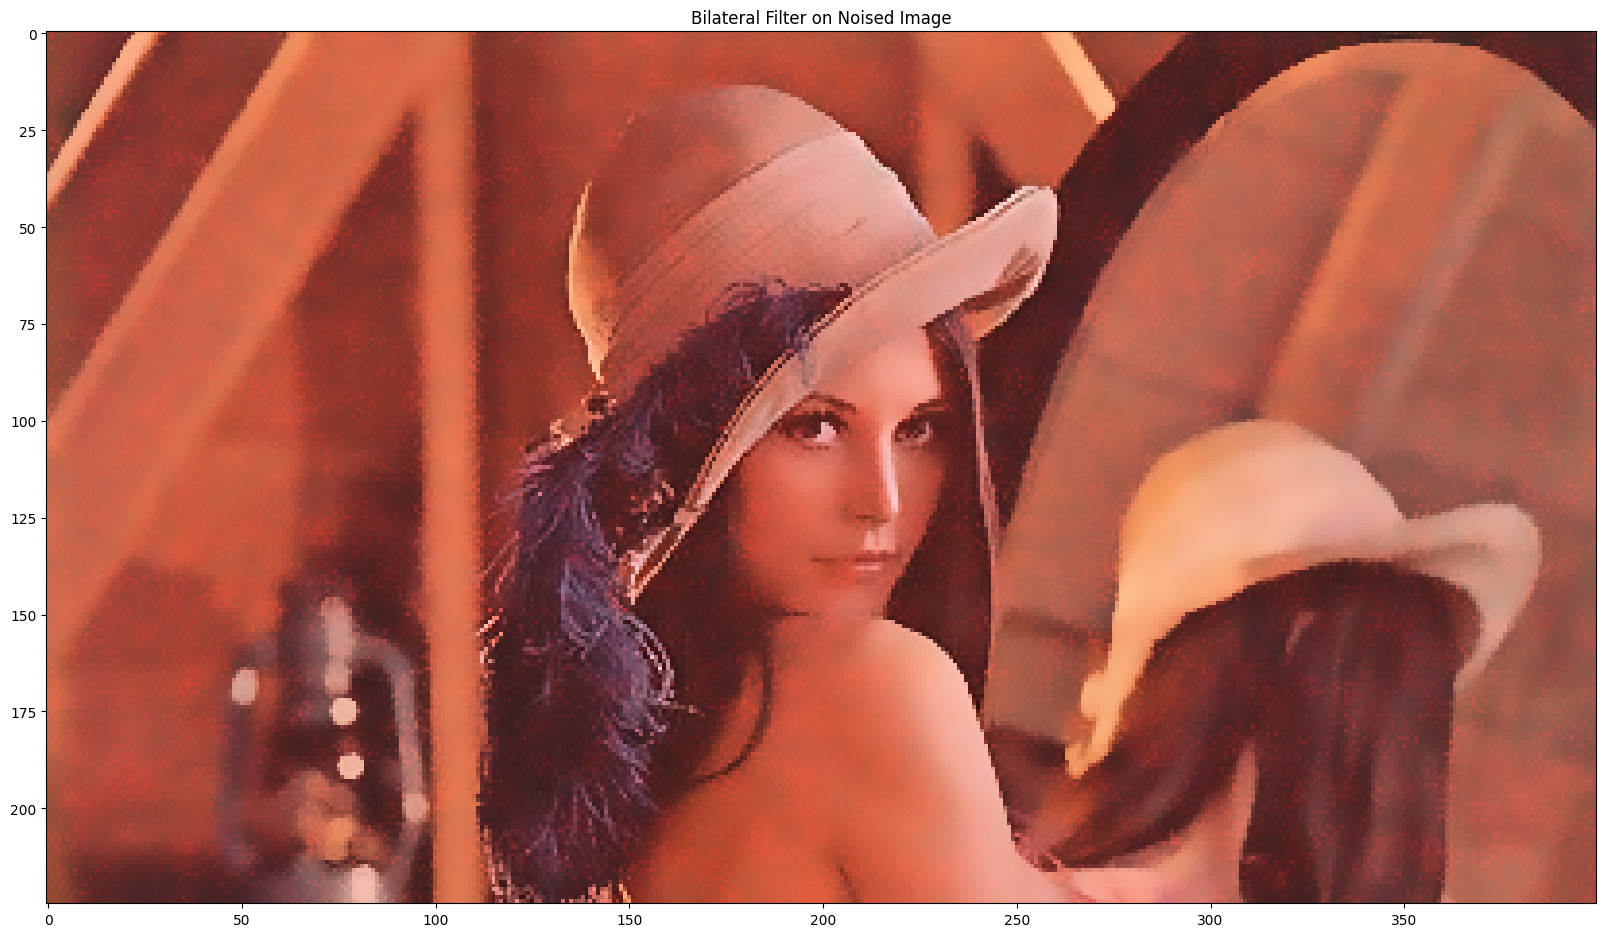

In [ ]:
imBGR = cv2.imread("images/lena.jpg")
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imRGB)
plt.title('Original')
plt.show()

im = np.zeros(imRGB.shape, dtype=np.uint8)
mean = 20
sigma = 50

cv2.randn(im, mean, sigma)
plt.figure(figsize = (20,20))
plt.imshow(im)
plt.title('Noise')
plt.show()

imRGB_noised = cv2.add(imRGB, im)
plt.figure(figsize = (20,20))
plt.imshow(imRGB_noised)
plt.title('Original + Noise')
plt.show()

meanblur = cv2.blur(imRGB_noised, (5,5))
plt.figure(figsize = (20,20))
plt.imshow(meanblur)
plt.title('Mean Blur on Noised Image')
plt.show()

medianblur = cv2.medianBlur(imRGB_noised, 5)
plt.figure(figsize = (20,20))
plt.imshow(medianblur)
plt.title('Median Blur on Noised Image')
plt.show()

bilblur = cv2.bilateralFilter(imRGB_noised, d=9, sigmaColor=75, sigmaSpace=75)
plt.figure(figsize = (20,20))
plt.imshow(bilblur)
plt.title('Bilateral Filter on Noised Image')
plt.show()

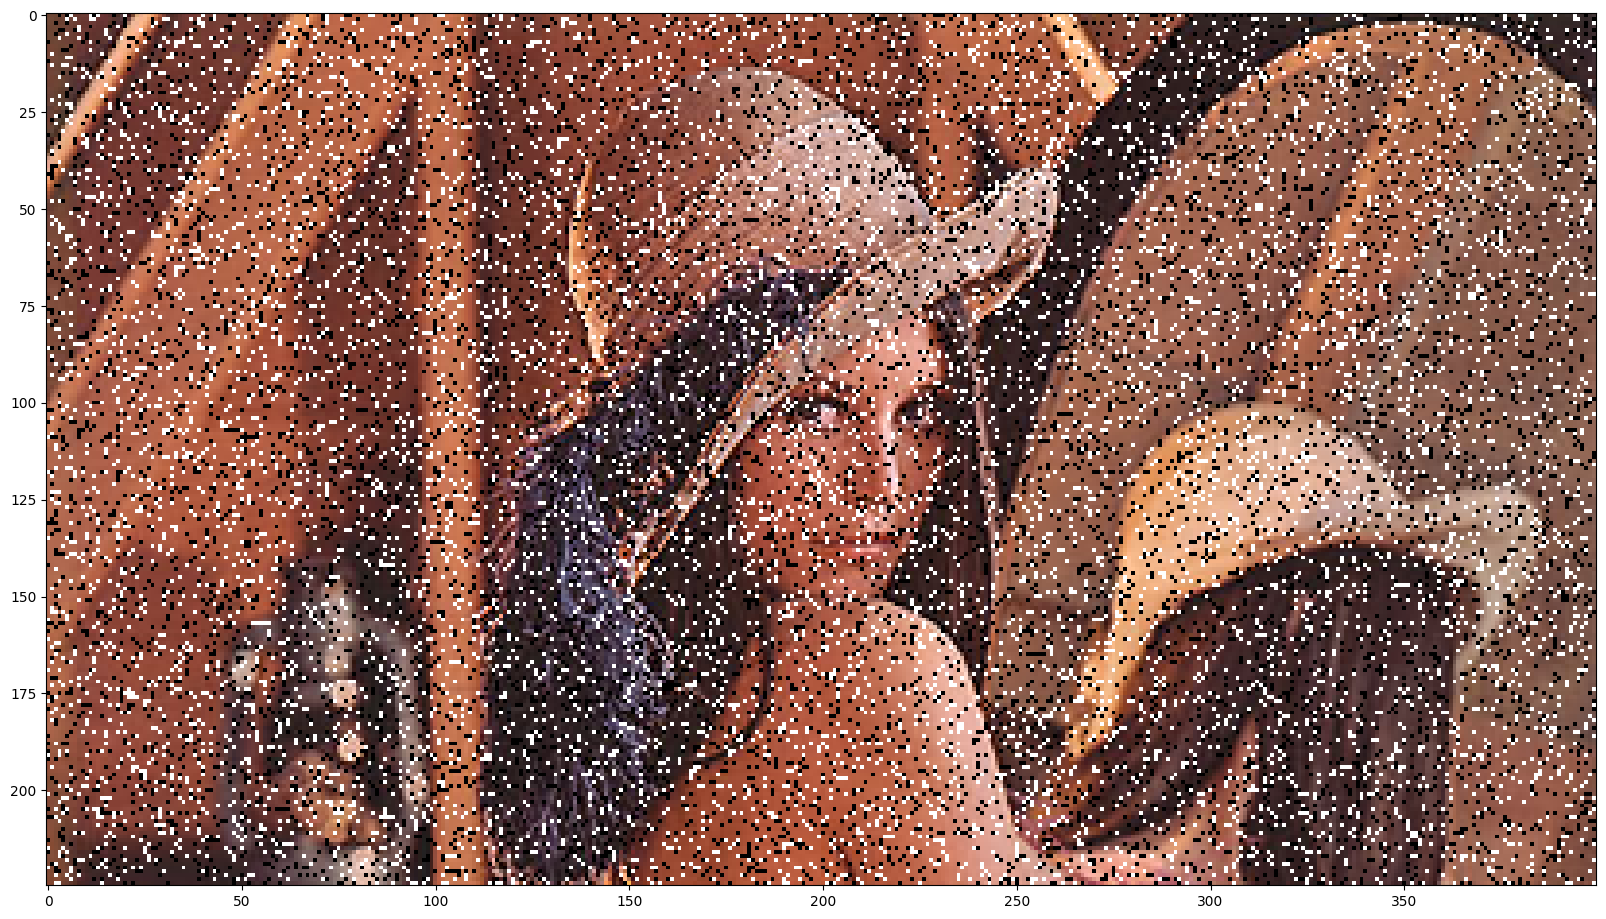

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgBGR= cv2.imread('images/lena.jpg')
imgRGB=cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.title('Original')
plt.show()



def addsalt_pepper(img, SNR):
    img_ = img.copy()
    c, h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(1, h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    mask = np.repeat(mask, c, axis=0)
    img_[mask == 1] = 255 # salt noise
    img_[mask == 2] = 0 #
    return img_

im_noise = addsalt_pepper(imgRGB.transpose(2, 1, 0), 0.8)
im_noise = im_noise.transpose(2, 1, 0)

plt.figure(figsize=(10,10))
plt.imshow(im_noise)
plt.title('Salt and pepper noise')
plt.show()

meanblur = cv2.blur(im_noise, (5,5))
plt.figure(figsize=(10,10))
plt.imshow(meanblur)
plt.title('Mean blur with 5x5 kernel')
plt.show()

medianblur = cv2.medianBlur(im_noise, 5)
plt.figure(figsize=(10,10))
plt.imshow(medianblur)
plt.title('Median blur with distance 5')
plt.show()


bilblur = cv2.bilateralFilter(im_noise, 9, 75, 75)
plt.figure(figsize=(10,10))
plt.imshow(bilblur)
plt.title('Bilateral filter with distance 5, sigmacolor=75 and sigmaspace=75')
plt.show()